# Pymaceuticals Inc.
---

### Analysis
Two study data files merged.  Duplicate mice rows identified, and removed the 'bad mice' from the clean data file. 
248 Mice included in the analysis
- The Average Tumor Volume was larger as the weight of the mouse increased; or the drug wasn't as effective with increased mouse weight.  
- Compared to the other drug regimens, the mice treated with Capomulin had smaller average tumor volumes than the other drug regimens. Note that there were either more mice in the study on the Capomulin and Ramicane treatments or they were studied for a longer time frame with more Timepoints as compared to the other 7 drug regimens in the study. 
- There were almost an equal number of males at 51% and females at 49% in this study.  The bad mouse removed from the clean study file was a female. 
Summary Statistics included in analysis
Visualizations:Bar and Pie charts, scatter, line and box plots, correlation and regression. 

I followed guidance and content learned in class room, office hours, Activities, Instructors, TAs, Tutors. 
Google

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [38]:
# Study data files
mouse_metadata_path =Path("../Resources/Mouse_metadata.csv")
study_results_path =Path("../Resources/Study_results.csv")


In [39]:
# Read the mouse data and put it in its own DataFrame
mouse_data_df = pd.read_csv(mouse_metadata_path)
mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [40]:
#Read the study data and put it in its own DataFrame
study_results_df=pd.read_csv(study_results_path)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [41]:
# Combine the two DataFrames # Display the data table for preview
combined_df=pd.DataFrame
combined_df= pd.merge(mouse_data_df, study_results_df, how = "right", on="Mouse ID")
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [42]:
# Checking the number of mice. #combined_df.count number of rows as long as its not a NAN
combined_df["Mouse ID"].nunique()


249

In [43]:
combined_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [44]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. google how to duplicate for 2 columns.  whole df .  drop.  loc. []
duplicate_row_series = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_row_series
duplicate_row_series.value_counts()
# 10 are duplicates

False    1883
True       10
dtype: int64

In [45]:
combined_df[duplicate_row_series] #to see the duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
#identify the type of data duplicate_row_series column Mouse ID
type(combined_df[duplicate_row_series]['Mouse ID'])

pandas.core.series.Series

In [47]:
bad_mice = combined_df[duplicate_row_series]['Mouse ID'].unique()
bad_mice

array(['g989'], dtype=object)

In [48]:
print(bad_mice)

['g989']


In [49]:
#display all the rows that have the bad mice in series.  Boolean is True / False  Want the opposite of the duplicate value of bad mice in series.  isin uses And, Or, Not 

bad_mouse_rows_series = combined_df["Mouse ID"].isin(bad_mice)
combined_df[bad_mouse_rows_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
(~bad_mouse_rows_series).value_counts()  #will give the good rows.  ~ is the opposite 


True     1880
False      13
Name: Mouse ID, dtype: int64

In [51]:
#bad mice removed/ duplicate Mouse ID rows removed from data file.  1893 total rows - 13 dup rows leaves 1880 rows. 
clean_df = combined_df[~bad_mouse_rows_series]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [52]:
#checking the number of mice in the clean_df
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_agg=clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [55]:
good_mice=clean_df['Drug Regimen'].value_counts()
good_mice


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [56]:
type(good_mice)

pandas.core.series.Series

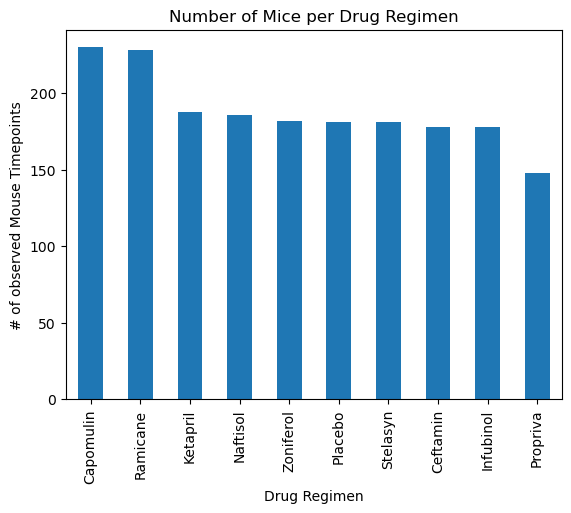

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_timepoints = clean_df[['Drug Regimen', 'Timepoint']].set_index('Drug Regimen').groupby('Drug Regimen').count().sort_values(by= 'Timepoint', ascending= False)
# print(drugs_timepoints)
#plt.xlabel("Drug Regimen")  plt.ylabel("Number of Mice") plt.title("Number of Mice per Treatment") or put it in one line 
mice_timepoints.plot(kind= 'bar', legend= False, xlabel= 'Drug Regimen', ylabel= '# of observed Mouse Timepoints', title = "Number of Mice per Drug Regimen")
plt.show()

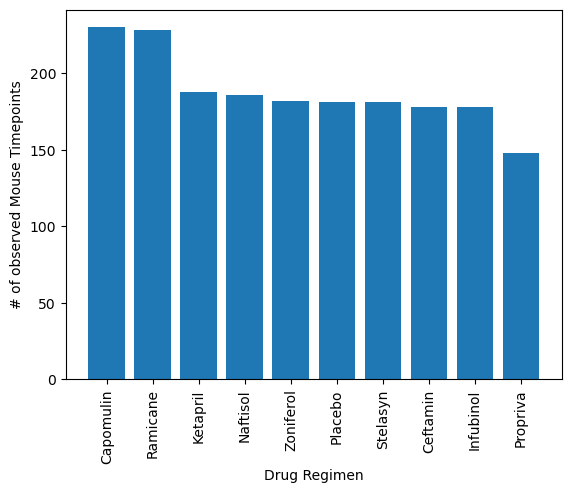

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mice_timepoints))
tick_locations = [i for i in x_axis]
y_axis = mice_timepoints['Timepoint']


figure= plt.figure()
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, mice_timepoints.index, rotation= 'vertical')
plt.xlabel ("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

plt.show()

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [60]:
combined_df["Sex"].nunique()

2

In [61]:
#value counts from originally merged df that contains the bad mouse.  Female is 935 before bad mouse was removed, and after removal count is 922 in next cell.  13 rows were removed. 
combined_df["Sex"].value_counts() 

Male      958
Female    935
Name: Sex, dtype: int64

In [62]:
#count of mice after duplicates removed, and bad mouse removed. 
mouse_sex = clean_df[['Sex', 'Mouse ID']].set_index('Sex').groupby('Sex').count().sort_values(by= 'Mouse ID', ascending= False)
mouse_sex

,Mouse ID
Sex,
Male,958
Female,922


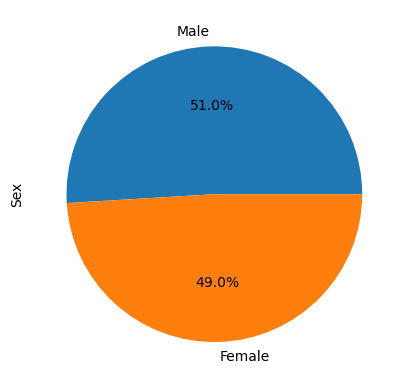

In [63]:
mouse_sex.plot(kind= 'pie', y= 'Mouse ID', legend= False, ylabel= 'Sex', autopct = '%1.1f%%')
mouse_sex.plot

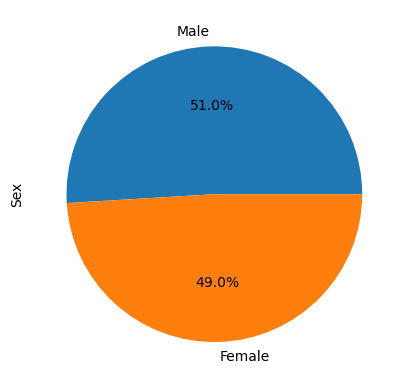

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex.index.to_list()
labels
values = mouse_sex['Mouse ID'].to_list()
values
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#combined_df is original merged df. 
treatment_regimens= combined_df.loc[(combined_df['Drug Regimen'] =='Capomulin') | (clean_df['Drug Regimen'] =='Ramicane') |
                             (clean_df['Drug Regimen'] =='Infubinol') |(clean_df['Drug Regimen'] =='Ceftamin'), :]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_regimens.groupby(['Mouse ID'])['Timepoint'].max()
#last_timepoint_df = treatment_regimens.groupby(['Mouse ID','Drug Regimen']).max(['Timepoint']).sort_values(by= 'Timepoint', ascending=False)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint #in next cell
last_tumor_volume_df =  pd.merge(last_timepoint, clean_df, on=('Mouse ID','Timepoint'))
last_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [66]:
type(last_tumor_volume_df)

pandas.core.frame.DataFrame

In [67]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = last_tumor_volume_df.loc[last_tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_data.append(final_tumor_volume)
    final_tumor_volume
    tumor_data
    drug_list

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
    print (f"Values below {lower_bound} and values above {upper_bound} could be outliers for {drug}.")


Values below 20.70456164999999 and values above 51.83201549 could be outliers for Capomulin.
Values below 17.912664470000003 and values above 54.30681135 could be outliers for Ramicane.
Values below 36.83290494999999 and values above 82.74144559000001 could be outliers for Infubinol.
Values below 25.355449580000002 and values above 87.66645829999999 could be outliers for Ceftamin.


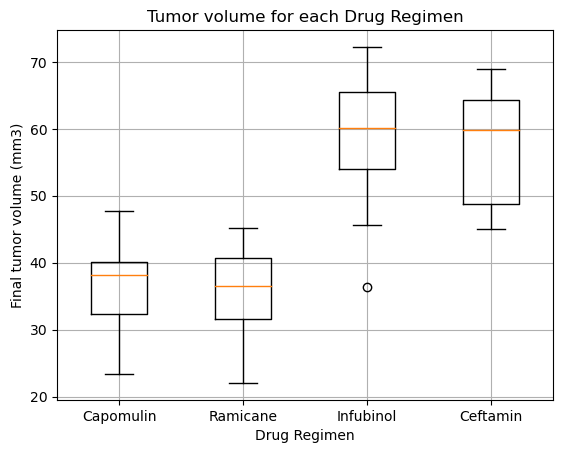

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# plt.boxplot(final_tumor_vol,labels=treatment)
# plt.ylabel("Tumor Volume (mm3)")
# plt.show()
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume for each Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final tumor volume (mm3)')
ax1.boxplot(tumor_data, labels = drug_list)
plt.grid()
plt.show()

## Line and Scatter Plots

The tested Mouse number is u364


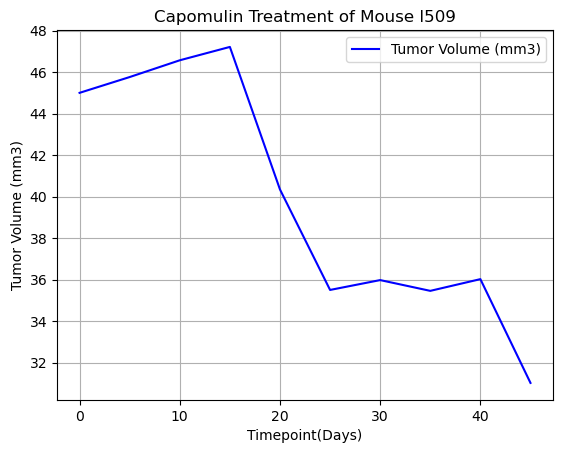

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
singlemouse_number=capomulin_df.iloc[len(capomulin_df)-1,:]["Mouse ID"]
singlemouse_df=capomulin_df.loc[capomulin_df["Mouse ID"]==singlemouse_number]
print("The tested Mouse number is "+ singlemouse_number)


ax=singlemouse_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)",color="blue")
ax.set_title("Capomulin Treatment of Mouse l509")
ax.set_xlabel("Timepoint(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

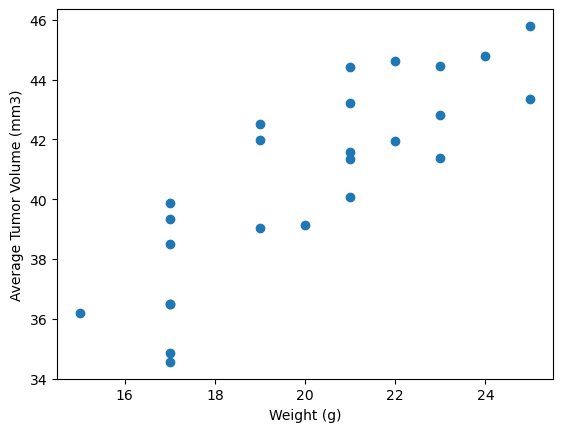

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(mouse_weight,avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model 
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(avg_tumor,mouse_weight)[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = capomulin_df.groupby(['Mouse ID']).mean() 
capomulin_regimen
capomulin_regimen.count()



The correlation between mouse weight and the average tumor volume is 0.84


C:\Users\Owner\AppData\Local\Temp\ipykernel_21564\4183909342.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_regimen = capomulin_df.groupby(['Mouse ID']).mean()


Age_months            25
Weight (g)            25
Timepoint             25
Tumor Volume (mm3)    25
Metastatic Sites      25
dtype: int64

The r-squared is: 0.7088568047708723
The corelation mouse weight and the average tumor volume is: 0.84


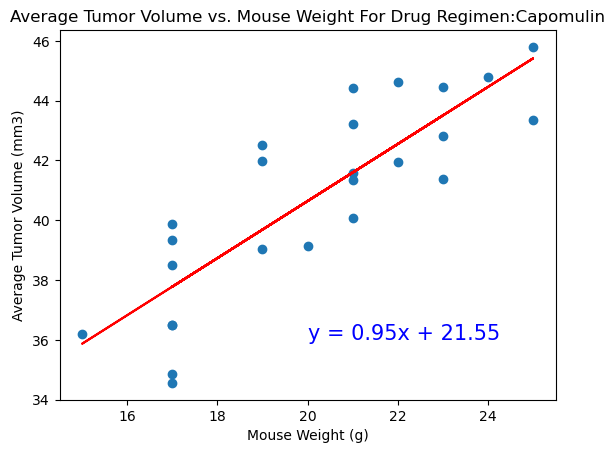

In [72]:
x_value =  capomulin_regimen['Weight (g)']
y_value = capomulin_regimen['Tumor Volume (mm3)']

plt.scatter(x_value, y_value)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=15,color="blue")
plt.title('Average Tumor Volume vs. Mouse Weight For Drug Regimen:Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
print(f'The corelation mouse weight and the average tumor volume is: {round(correlation[0],2)}')
plt.show()